# Modeling: 
1. Create a decision tree:
2. Random Forest
3. KNN
4. Logistic Regression

In [1]:
import warnings
warnings.filterwarnings("ignore")
import wrangle as wr

#new imports
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# imports for modeling
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# for knn
from sklearn.neighbors import KNeighborsClassifier

# for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# for random forest
from sklearn.ensemble import RandomForestClassifier

# for logistic regression
from sklearn.linear_model import LogisticRegression

In [2]:
telco = wr.new_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [3]:
telco  = wr.clean_telco_model()

In [4]:
telco = wr.create_dummy_columns(telco)

In [5]:
train, val, test = wr.train_validate_test(telco)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
448,0661-KBKPA,Male,0,Yes,Yes,53,Yes,Yes,No,No,...,0,1,1,1,0,0,0,0,0,1
168,0269-XFESX,Male,0,Yes,Yes,23,Yes,Yes,No internet service,No internet service,...,1,0,0,1,0,0,1,0,0,1
1718,2506-CLAKW,Female,0,No,No,6,Yes,No,Yes,Yes,...,0,1,1,0,0,1,0,0,0,0
6600,9381-NDKME,Female,1,Yes,No,24,No,No phone service,No,No,...,0,1,1,0,0,0,0,1,0,0
4033,5687-DKDTV,Female,0,No,No,4,Yes,No,No internet service,No internet service,...,1,0,0,0,0,0,1,0,0,1


### baseline: 

In [6]:
# note to self:
# positive : no_churn
# negative: churn

In [7]:
# create baseline
baseline_accuracy = (train.did_churn == 0).mean()
baseline_accuracy

0.7347197565305605

### split data in x and y

In [8]:
# need to drop non dummy columns
def drop_columns(train, val, test):
    train.set_index('customer_id', inplace=True)
    
    
    val.set_index('customer_id', inplace=True)
    
    
    test.set_index('customer_id', inplace=True)

    
    dropcols = ['gender',
                'senior_citizen',
                'partner',
                'dependents',
                'phone_service',
                'multiple_lines',
                'online_security',
                'online_backup',
                'device_protection',
                'tech_support',
                'streaming_tv',
                'streaming_movies',
                'paperless_billing',
                'contract_type',
                'internet_service_type',
                'payment_type',
               'churn']
    train.drop(columns = dropcols, inplace = True)
    val.drop(columns = dropcols, inplace=True)
    test.drop(columns = dropcols, inplace=True)
    return train, val, test

In [9]:
train, val ,test = drop_columns(train, val, test)

In [10]:
train.head()

,tenure,monthly_charges,total_charges,did_churn,gender_Male,senior_citizen_1,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,...,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
customer_id,,,,,,,,,,,,,,,,,,,,,
0661-KBKPA,53,78.75,3942.45,0,1,0,1,1,1,0,...,0,1,1,1,0,0,0,0,0,1
0269-XFESX,23,24.35,538.50,0,1,0,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2506-CLAKW,6,98.15,567.45,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
9381-NDKME,24,40.65,933.30,1,0,1,1,0,0,1,...,0,1,1,0,0,0,0,1,0,0
5687-DKDTV,4,20.35,77.50,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [11]:
# features we are looking at: payment
# create x and y
features = ['senior_citizen_1', 'contract_type_One year', 'contract_type_Two year', 
            'internet_service_type_Fiber optic', 'internet_service_type_None',
           'monthly_charges',
            'payment_type_Credit card (automatic)','payment_type_Electronic check','payment_type_Mailed check']
X_train = train[features]
y_train = train.did_churn

X_val = val[features]
y_val = val.did_churn

X_test = test[features]
y_test = test.did_churn

In [12]:
print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape)
print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)
print(type(X_val))
print(type(y_val))

X_train type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (3943, 9)
y_train type: <class 'pandas.core.series.Series'>
y_train shape: (3943,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Decision Tree:

In [13]:
# create the model: 
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [14]:
#fit the model
clf = clf.fit(X_train, y_train)

In [15]:
clf.predict(X_train)[:5]

array([0, 0, 0, 0, 0])

In [16]:
clf.score(X_train, y_train)

0.7572914024854172

### Evaluate confusion matrix:
postive = no churn or 0 <br>
negative = churn or 1

In [17]:
y_pred = clf.predict(X_train)

In [18]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[2508,  389],
       [ 568,  478]])

In [19]:
y_train_df = pd.Series(y_train)
y_train_df.unique()

array([0, 1])

In [20]:
labels = sorted(y_train_df.unique())
labels

[0, 1]

In [21]:
pd.DataFrame(conf)

,0,1
0,2508,389
1,568,478


In [22]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2897
           1       0.55      0.46      0.50      1046

    accuracy                           0.76      3943
   macro avg       0.68      0.66      0.67      3943
weighted avg       0.75      0.76      0.75      3943



Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [23]:
conf

array([[2508,  389],
       [ 568,  478]])

In [24]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

,0_predict,1_predict
0_actual,2508,389
1_actual,568,478


In [25]:
conf.ravel()

array([2508,  389,  568,  478])

In [26]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(2508, 389, 568, 478)

In [27]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

recall = TP / (TP + FN)
precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [28]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f'Recall{recall}')
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7572914024854172

True Positive Rate/Sensitivity/Recall/Power: 0.4569789674952199
False Positive Rate/False Alarm Ratio/Fall-out: 0.13427683810838797
True Negative Rate/Specificity/Selectivity: 0.865723161891612
False Negative Rate/Miss Rate: 0.5430210325047801

Precision/PPV: 0.5513264129181085
Recall0.4569789674952199
F1 Score: 0.4997386304234187

Support (0): 1046
Support (1): 2897


In [29]:
#for lots
for x in range(1,20):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

for depth of  1, the accuracy is 0.73
for depth of  2, the accuracy is 0.75
for depth of  3, the accuracy is 0.76
for depth of  4, the accuracy is 0.77
for depth of  5, the accuracy is 0.78
for depth of  6, the accuracy is 0.78
for depth of  7, the accuracy is 0.79
for depth of  8, the accuracy is 0.8
for depth of  9, the accuracy is 0.81
for depth of 10, the accuracy is 0.82
for depth of 11, the accuracy is 0.83
for depth of 12, the accuracy is 0.84
for depth of 13, the accuracy is 0.86
for depth of 14, the accuracy is 0.87
for depth of 15, the accuracy is 0.88
for depth of 16, the accuracy is 0.89
for depth of 17, the accuracy is 0.9
for depth of 18, the accuracy is 0.91
for depth of 19, the accuracy is 0.92


In [30]:
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_val, y_val)
    
    scores_all.append([x, train_acc, val_acc])


In [31]:
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df.head()

,max_depth,train_acc,val_acc
0,1,0.734720,0.734477
1,2,0.747147,0.759905
2,3,0.757291,0.772915
3,4,0.770226,0.785334
4,5,0.775805,0.781195


In [32]:
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc

In [33]:
scores_df.sort_values('diff').head(7)

,max_depth,train_acc,val_acc,diff
2,3,0.757291,0.772915,-0.015624
3,4,0.770226,0.785334,-0.015108
1,2,0.747147,0.759905,-0.012759
4,5,0.775805,0.781195,-0.005389
5,6,0.780624,0.781786,-0.001162
0,1,0.734720,0.734477,0.000243
6,7,0.787979,0.778238,0.009741


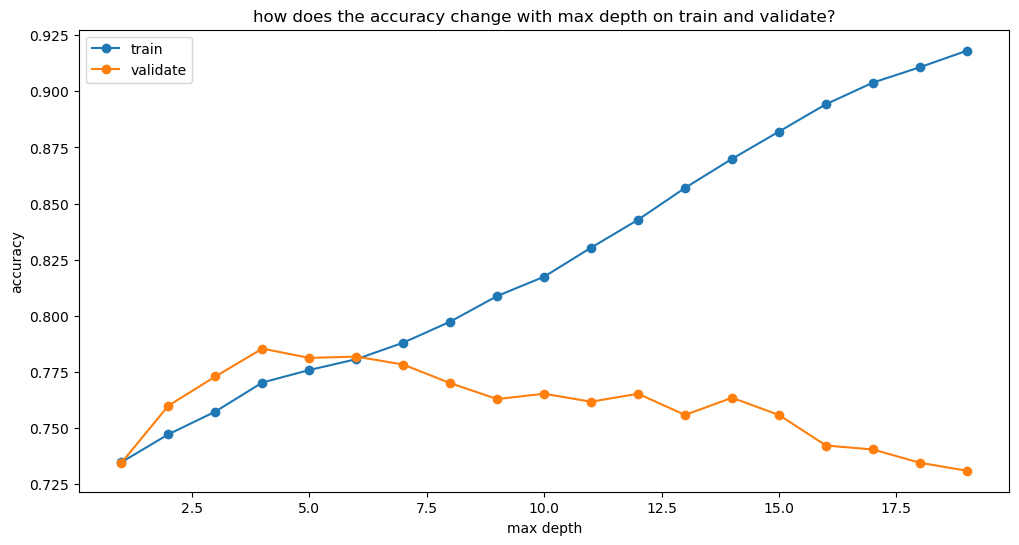

In [34]:
plt.figure(figsize=(12,6))
plt.plot(scores_df.max_depth, scores_df.train_acc, label='train', marker='o')
plt.plot(scores_df.max_depth, scores_df.val_acc, label='validate', marker='o')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title('how does the accuracy change with max depth on train and validate?')
plt.legend()
plt.show()

## Best Decision Tree

In [35]:
# make a decision tree based on max depth = 7

In [36]:
metrics = []
for d in range(1,11):
    #base line
    baseline_accuracy = (train.did_churn == 0).mean()

    #create tree object
    clf = DecisionTreeClassifier(max_depth=d, random_state=123)
  
    
    # fit model
    clf = clf.fit(X_train, y_train)
    
    # train accurecy score
    train_score = clf.score(X_train, y_train)
    validate_score = clf.score(X_val, y_val)
    
    # create a dictionary of scores
    output = {
        "depth": d,
        "train_score": train_score,
         "validate_score": validate_score,
        "difference": train_score - validate_score,
        "train_baseline_diff": baseline_accuracy - train_score,
        "validate_baseline_diff": baseline_accuracy - validate_score,
        "baseline_accuracy": baseline_accuracy,
    }
    
    metrics.append(output)

In [37]:
# get the result as a dataframe
model_df = pd.DataFrame(metrics)
model_df

,depth,train_score,validate_score,difference,train_baseline_diff,validate_baseline_diff,baseline_accuracy
0,1,0.734720,0.734477,0.000243,0.000000,0.000243,0.73472
1,2,0.747147,0.759905,-0.012759,-0.012427,-0.025186,0.73472
2,3,0.757291,0.772915,-0.015624,-0.022572,-0.038196,0.73472
3,4,0.770226,0.785334,-0.015108,-0.035506,-0.050614,0.73472
4,5,0.775805,0.781195,-0.005389,-0.041085,-0.046475,0.73472
5,6,0.780624,0.781786,-0.001162,-0.045904,-0.047066,0.73472
6,7,0.787979,0.778238,0.009741,-0.053259,-0.043518,0.73472
7,8,0.797362,0.769959,0.027404,-0.062643,-0.035239,0.73472
8,9,0.809282,0.762271,0.047011,-0.074563,-0.027551,0.73472
9,10,0.817398,0.764636,0.052762,-0.082678,-0.029917,0.73472


In [38]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)

In [39]:
clf = clf.fit(X_train, y_train)

In [40]:
clf.predict(X_train)[:5]

array([0, 0, 1, 0, 0])

In [41]:
clf.score(X_train, y_train)

0.7879786964240426

In [42]:
y_pred = clf.predict(X_train)

In [43]:
conf = confusion_matrix(y_train, y_pred)
conf

array([[2543,  354],
       [ 482,  564]])

In [44]:
conf.ravel()

array([2543,  354,  482,  564])

In [45]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

(2543, 354, 482, 564)

In [46]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [47]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7879786964240426

True Positive Rate/Sensitivity/Recall/Power: 0.5391969407265774
False Positive Rate/False Alarm Ratio/Fall-out: 0.12219537452537108
True Negative Rate/Specificity/Selectivity: 0.8778046254746289
False Negative Rate/Miss Rate: 0.4608030592734226

Precision/PPV: 0.6143790849673203
F1 Score: 0.5743380855397148

Support (0): 1046
Support (1): 2897


In [48]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2897
           1       0.61      0.54      0.57      1046

    accuracy                           0.79      3943
   macro avg       0.73      0.71      0.72      3943
weighted avg       0.78      0.79      0.78      3943



# Random Forest

In [49]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [50]:
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=124)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)


Tree of 1 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.734720,0.0,0.73472,0.367360,0.539813
recall,1.000000,0.0,0.73472,0.500000,0.734720
f1-score,0.847076,0.0,0.73472,0.423538,0.622363
support,2897.000000,1046.0,0.73472,3943.000000,3943.000000


In [51]:
# sklearn confusion matrix
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,2897,1046
1,0,0


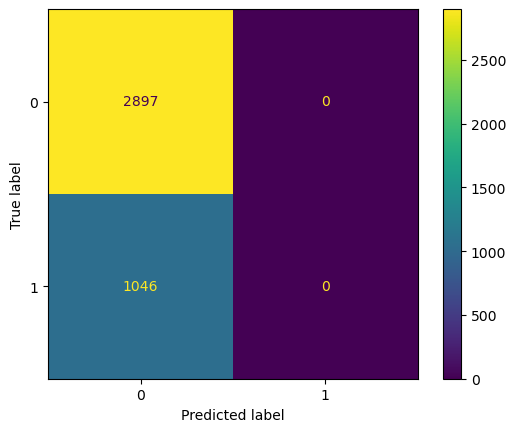

In [52]:
ConfusionMatrixDisplay.from_estimator(forest1, X_train, y_train);

In [53]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(0, 2897, 0, 1046)

In [54]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7347197565305605
True Positive Rate: 0.0
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 1.0
Precision: nan
Recall: 0.0
F1 Score: nan
Support (0): 1046
Support (1): 2897


In [55]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.734720,0.734477,0.000243
1,3,0.766422,0.770550,-0.004128
2,4,0.770226,0.786517,-0.016291
3,5,0.771747,0.787108,-0.015361
4,6,0.777834,0.788291,-0.010457
5,7,0.784682,0.791248,-0.006566
6,8,0.794065,0.782969,0.011097
7,9,0.808775,0.774690,0.034086
8,10,0.834644,0.762862,0.071781
9,11,0.855186,0.762862,0.092324


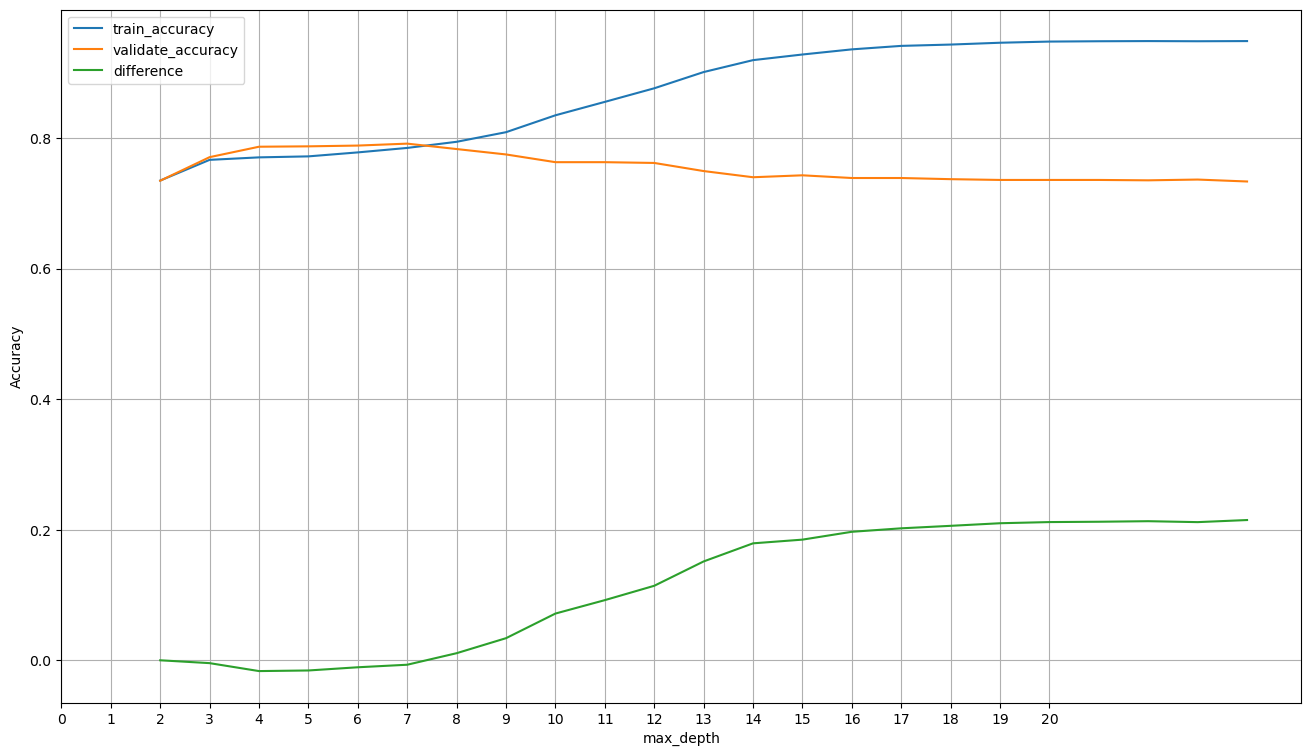

In [56]:
df.set_index('max_depth').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [57]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []
max_depth = 8

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_val, y_val)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.734720,0.734477,0.000243
1,3,3,0.766422,0.770550,-0.004128
2,4,4,0.770226,0.786517,-0.016291
3,5,5,0.772508,0.787108,-0.014600
4,6,6,0.776059,0.787108,-0.011049
5,7,7,0.779863,0.790656,-0.010793


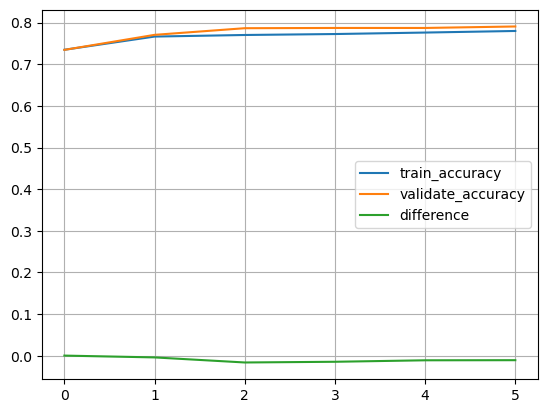

In [58]:
df[['train_accuracy', 'validate_accuracy','difference']].plot()
plt.grid()

## Best Random Forest Model

In [59]:
#best model with info:
# Make the model
forest1 = RandomForestClassifier(max_depth=7, min_samples_leaf = 7, random_state=124)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 4 depth")
pd.DataFrame(report)

Tree of 4 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.819296,0.618922,0.780624,0.719109,0.766141
recall,0.899896,0.450287,0.780624,0.675092,0.780624
f1-score,0.857707,0.521306,0.780624,0.689506,0.768466
support,2897.000000,1046.000000,0.780624,3943.000000,3943.000000


In [60]:
# sklearn confusion matrix
pd.DataFrame(confusion_matrix(y_predictions, y_train))

,0,1
0,2607,575
1,290,471


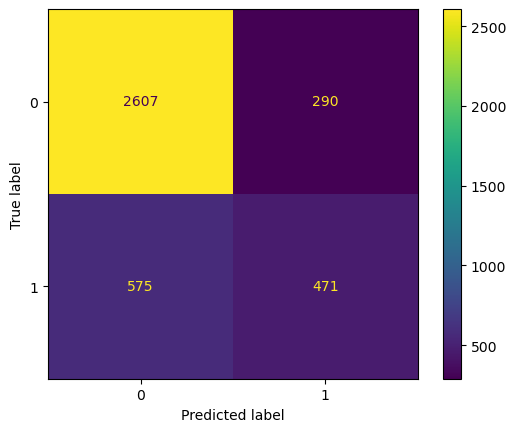

In [61]:
ConfusionMatrixDisplay.from_estimator(forest1, X_train, y_train);

In [62]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(471, 2607, 290, 575)

In [63]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7806238904387522
True Positive Rate: 0.4502868068833652
False Positive Rate: 0.10010355540214015
True Negative Rate: 0.8998964445978599
False Negative Rate: 0.5497131931166348
Precision: 0.6189224704336399
Recall: 0.4502868068833652
F1 Score: 0.5213060320973989
Support (0): 1046
Support (1): 2897


# Logistic Regression:

In [64]:
baseline_accuracy

0.7347197565305605

In [65]:
metrics = []

for c in np.arange(0.0001,0.1, 0.001):
     # base line
    baseline_accuracy = (train.did_churn == 0).mean()
    
    # create ramdom tree object
    logReg = LogisticRegression(C=c, random_state=123, max_iter= 1000)
    
    # fit the model
    randFor = logReg.fit(X_train, y_train)
    
    # get accuracy scores
    train_score = randFor.score(X_train, y_train)
    validate_score = randFor.score(X_val, y_val)
    
    # create a dictionary of scores
    output = {
        "C": c,
        "train_score": train_score,
         "validate_score": validate_score,
        "difference": train_score - validate_score,
        "train_baseline_diff": baseline_accuracy - train_score,
        "validate_baseline_diff": baseline_accuracy - validate_score,
        "baseline_accuracy": baseline_accuracy
    }
    
    metrics.append(output)

In [66]:
# get the result as a dataframe
model_df = pd.DataFrame(metrics)
model_df

,C,train_score,validate_score,difference,train_baseline_diff,validate_baseline_diff,baseline_accuracy
0,0.0001,0.734720,0.734477,0.000243,0.000000,0.000243,0.73472
1,0.0011,0.734720,0.734477,0.000243,0.000000,0.000243,0.73472
2,0.0021,0.734720,0.734477,0.000243,0.000000,0.000243,0.73472
3,0.0031,0.734466,0.735068,-0.000602,0.000254,-0.000348,0.73472
4,0.0041,0.733705,0.735068,-0.001363,0.001014,-0.000348,0.73472
...,...,...,...,...,...,...,...
95,0.0951,0.771494,0.786517,-0.015023,-0.036774,-0.051797,0.73472
96,0.0961,0.771494,0.786517,-0.015023,-0.036774,-0.051797,0.73472
97,0.0971,0.771494,0.786517,-0.015023,-0.036774,-0.051797,0.73472
98,0.0981,0.771494,0.786517,-0.015023,-0.036774,-0.051797,0.73472


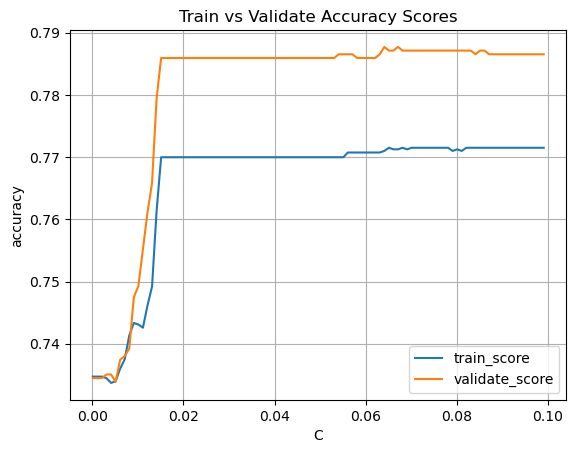

In [67]:
model_df[model_df.columns[:-4]].set_index("C").plot()
plt.ylabel('accuracy')
plt.xlabel('C')
plt.title("Train vs Validate Accuracy Scores")
plt.grid()
plt.show()

In [68]:
# find the model with smallest ifference between the train and validate
high_models = model_df[(model_df.C > 0.045) & (model_df.C < 0.055)]

high_models[high_models.difference == high_models.difference.min()]

,C,train_score,validate_score,difference,train_baseline_diff,validate_baseline_diff,baseline_accuracy
54,0.0541,0.769972,0.786517,-0.016545,-0.035252,-0.051797,0.73472


### Best Model:

In [69]:
logit = LogisticRegression(C = 0.0541, random_state=123)

In [70]:
logit.fit(X_train, y_train)

LogisticRegression(C=0.0541, random_state=123)

In [71]:
y_pred = logit.predict(X_train)

In [72]:
logit.score(X_train, y_train)

0.7699721024600558

In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2897
           1       0.59      0.43      0.50      1046

    accuracy                           0.77      3943
   macro avg       0.70      0.66      0.67      3943
weighted avg       0.75      0.77      0.76      3943



In [74]:
y_val_pred = logit.predict(X_val)

In [75]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1242
           1       0.65      0.42      0.51       449

    accuracy                           0.79      1691
   macro avg       0.73      0.67      0.69      1691
weighted avg       0.77      0.79      0.77      1691



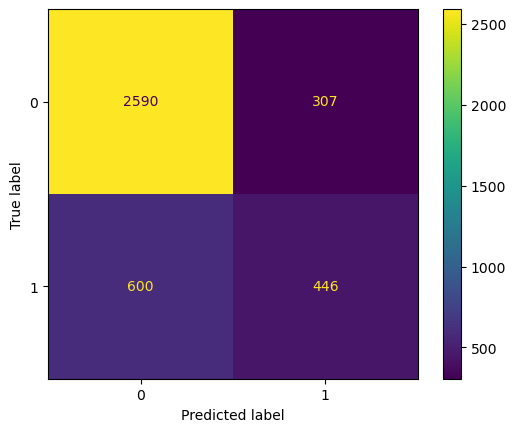

In [76]:
ConfusionMatrixDisplay.from_estimator(logit, X_train, y_train);

In [77]:
TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

(446, 2590, 307, 600)

In [78]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

Accuracy: 0.7699721024600558
True Positive Rate: 0.42638623326959846
False Positive Rate: 0.10597169485674836
True Negative Rate: 0.8940283051432516
False Negative Rate: 0.5736137667304015
Precision: 0.5922974767596282
Recall: 0.42638623326959846
F1 Score: 0.49583101723179535
Support (0): 1046
Support (1): 2897


# KNN

In [79]:
baseline_accuracy

0.7347197565305605

In [80]:
print("X_train type:", type(X_train))
print("X_train shape:", X_train.shape)
print("y_train type:", type(y_train))
print("y_train shape:", y_train.shape)

X_train type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (3943, 9)
y_train type: <class 'pandas.core.series.Series'>
y_train shape: (3943,)


In [81]:
# Convert Pandas DataFrames to NumPy arrays
X_train = X_train
y_train = y_train

X_val = X_val
y_val = y_val

X_test = X_test
y_test = y_test

# Make the KNN classifier
knn = KNeighborsClassifier()

# Fit the KNN classifier
knn.fit(X_train, y_train)

# Use the trained classifier
y_train_pred = knn.predict(X_train)


In [82]:
#get the accuracy score of train set
train_score = knn.score(X_train, y_train)
train_score

0.8161298503677403

In [83]:
#confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,2619,278
Actual 1,447,599


In [84]:
#classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      2897
           1       0.68      0.57      0.62      1046

    accuracy                           0.82      3943
   macro avg       0.77      0.74      0.75      3943
weighted avg       0.81      0.82      0.81      3943



In [85]:
#classification report as a df
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True)).T

,precision,recall,f1-score,support
0,0.854207,0.904039,0.878417,2897.00000
1,0.683010,0.572658,0.622985,1046.00000
accuracy,0.816130,0.816130,0.816130,0.81613
macro avg,0.768609,0.738348,0.750701,3943.00000
weighted avg,0.808792,0.816130,0.810656,3943.00000


In [86]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.816130
1,true_positive_rate,0.572658
2,false_positive_rate,0.095961
3,true_negative_rate,0.904039
4,false_negative_rate,0.427342
5,precision,0.683010
6,recall,0.572658
7,f1_score,0.622985
8,support_pos,1046.000000
9,support_neg,2897.000000


In [87]:
def print_cm_metrics(cm):
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    return pd.DataFrame(dict)

In [88]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred


In [89]:
#Now, let's make a function to return the 
#accuracy, confusion matrix and classification report

def evaluate_clf(model, X, y, y_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1'])

    # classification report
    crdf = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    
    # confusion matrix metrics
    metrics = print_cm_metrics(cm)
    
    return accuracy, cmdf, crdf, metrics

## Best KNN

In [90]:
#using the functions we created above, and store what's returned in variables:
k = 14
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_val)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_val, y_val, y_validate_pred)

In [91]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 14

********Train Evaluation********

Accuracy: 0.780877504438245

Confusion Matrix:
          Pred 0  Pred 1
Actual 0    2645     252
Actual 1     612     434

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.812097     0.632653  0.780878     0.722375      0.764494
recall        0.913013     0.414914  0.780878     0.663964      0.780878
f1-score      0.859604     0.501155  0.780878     0.680379      0.764514
support    2897.000000  1046.000000  0.780878  3943.000000   3943.000000

Metrics: 
                metric        score
0             accuracy     0.780878
1   true_positive_rate     0.414914
2  false_positive_rate     0.086987
3   true_negative_rate     0.913013
4  false_negative_rate     0.585086
5            precision     0.632653
6               recall     0.414914
7             f1_score     0.501155
8          support_pos  1046.000000
9          support_neg  2897.000000
 
____________________________

In [92]:
k = 20
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_val)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_val, y_val, y_validate_pred)

In [93]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 20

********Train Evaluation********

Accuracy: 0.7780877504438245

Confusion Matrix:
          Pred 0  Pred 1
Actual 0    2630     267
Actual 1     608     438

Classification Report:
                     0            1  accuracy    macro avg  weighted avg
precision     0.812230     0.621277  0.778088     0.716753      0.761574
recall        0.907836     0.418738  0.778088     0.663287      0.778088
f1-score      0.857376     0.500286  0.778088     0.678831      0.762647
support    2897.000000  1046.000000  0.778088  3943.000000   3943.000000

Metrics: 
                metric        score
0             accuracy     0.778088
1   true_positive_rate     0.418738
2  false_positive_rate     0.092164
3   true_negative_rate     0.907836
4  false_negative_rate     0.581262
5            precision     0.621277
6               recall     0.418738
7             f1_score     0.500286
8          support_pos  1046.000000
9          support_neg  2897.000000
 
___________________________

In [94]:
metrics = []

for k in range(1,21):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_val)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_val, y_val)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)
    
eval_df = pd.DataFrame(metrics)
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.942683,0.727380,0.215303
1,2,0.844027,0.748078,0.095949
2,3,0.851636,0.740982,0.110654
3,4,0.813847,0.755766,0.058082
4,5,0.816130,0.760497,0.055633
5,6,0.800152,0.755174,0.044978
6,7,0.801167,0.758723,0.042444
7,8,0.791022,0.762862,0.028160
8,9,0.792290,0.756949,0.035342
9,10,0.789754,0.752218,0.037536


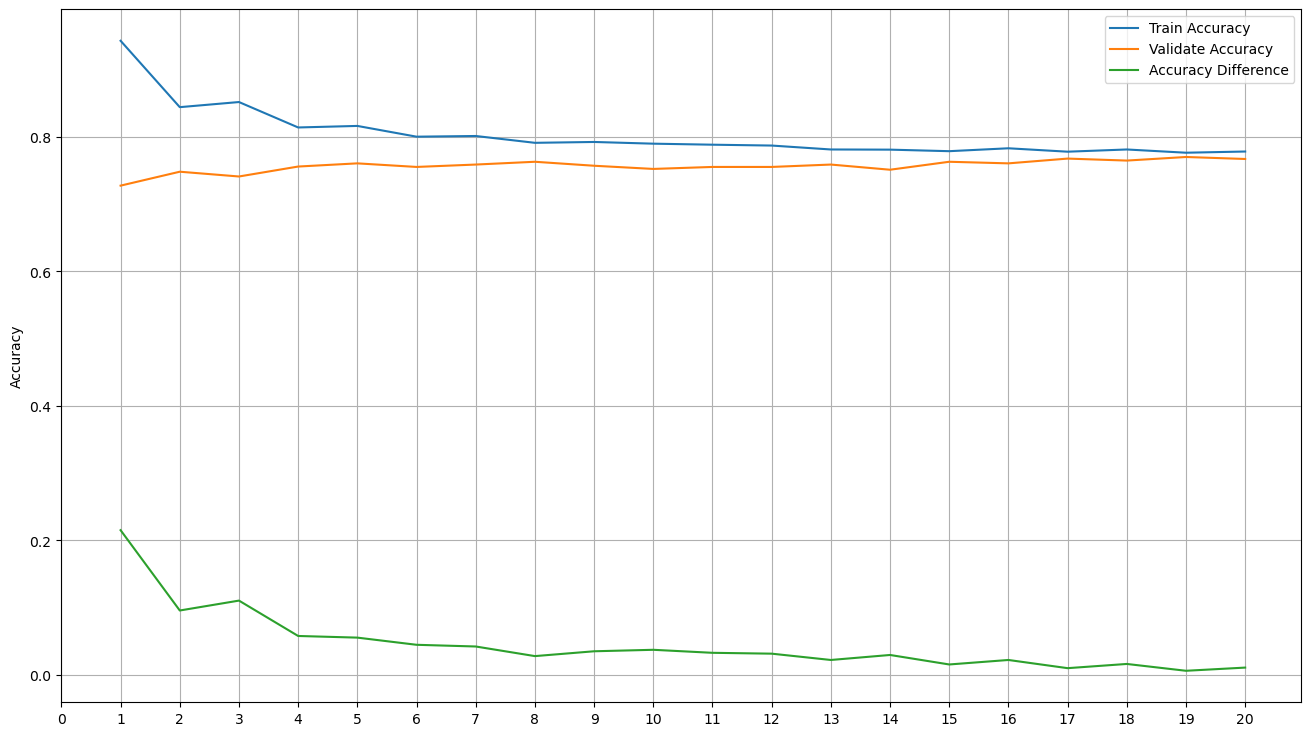

In [95]:
# plot the data
plt.figure(figsize=(16,9))
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

In [96]:
# k- 12 is the best model: 

# BEST MODEL

In [97]:
# run this in the final paper